## General project workflow
1. Understand the problem 
2. Exploratory Data Analysis
3. a) Clean and reformat data, and b) Feature engineering to create a dataset for machine learning
4. Compare several machine learning models and select one
5. Optimize the selected model
6. Investigate model predictions (e.g., feature importance using the "random bar" method)
7. Draw conclusions 

In [113]:
'''data'''
import pandas as pd
import numpy as np
import scipy.stats as stats

'''common'''
from pathlib import Path
from collections import OrderedDict
from typing import Dict
from collections import Counter

'''visualization'''
import matplotlib.pyplot as plt
import seaborn as sns

'''plotting defaults'''
# the %matplotlib inline will make your plot outputs appear and be stored within the notebook
# you don't need to use plt.show() to make the figure to appear inside a cell in the notebook
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.rcParams["font.size"] = 18
plt.rcParams["patch.edgecolor"]= "k"

'''pandas options'''
# display maximum of 150 columns in a pandas dataframe
pd.options.display.max_columns = 150

In [114]:
# Customized modules
import src.data_manager as dm
import src.processing as pp

In [115]:
# Reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import data
- I am provided train set (with labels) and test set (no labels)

In [116]:
train = dm.load_data(Path("data"),"train.csv")
test = dm.load_data(Path("data"),"test.csv")
train.shape, test.shape

((9557, 143), (23856, 142))

In [117]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [118]:
# Take a look at data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


**There are 8 float variables, 130 int varibales (but some of which could be booleans or ordinal variables), and 5 str (objects) that needs to be one-hot encoded, or label encoded before being used for training ML models. The DV is a integer with 4 classes.**

**Note that in real-life/non-kaggle datasets, you will not be given a test dataset in advance. That means I wouldn't know the extent of missingness, which columns has missing values, which variable has outliers, or even the set of features (could have more or less than the train set) in the new/unknown data. I can only make assumption that the new/unknown dataset would have similar characteristics as the train set.**

**If no test set is available (in the real-world case), I should create a test (hold out) set from the labeled data. I will NOT explore this hold-out set in order to avoid `data snooping bias`. I will only use the test set to evlauate my final model.**

## First data exploration
- Let's take a look at several variables of interest
- So far, we will just use the train data for data exploration 

**idhogar**: an unique identifier for each household. I use this varibale to group individuals by households. All individuals within the same household should have the same `idhogar`

In [120]:
train.idhogar.sample(10)

5269    c81c8b407
1866    1d3695e4c
2697    6b13e8ac3
8149    8857dd685
6343    4214d5787
1358    27aaac948
205     9d5fdd09f
7505    aae86b151
8082    c8edf62b0
3207    890b416aa
Name: idhogar, dtype: object

In [121]:
print(f"There are {len(train.idhogar.unique())} households in the train data.")

There are 2988 households in the train data.


**parentesco1:** indicates if a respondent is the head of the household (1 = head; 0 = not head)

In [122]:
train.parentesco1.value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

There are 2988 households (unique idhogar id), but only 2973 heads of households. That means some households have no heads.

In [123]:
train.shape

(9557, 143)

In the train set, there are 2988households. With 9557 respondents, that means on average, there are approximately three individuals per household.

### Target: the outcome variable
- 1 = extreme poverty 
- 2 = moderate poverty 
- 3 = vulnerable households 
- 4 = non vulnerable households

- Classes are imbalanced: we have a multiclass imbalanced classification problem. The majority of households are not vulnerable households. And only 8% of the households have extreme poverty.

In [124]:
train.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [125]:
train.Target.value_counts(normalize=True)

4    0.627394
2    0.167103
3    0.126504
1    0.079000
Name: Target, dtype: float64

### Integer columns that needs to be recoded
- There could be some integer columns that are actually categorical, but are encoded as integers. One way to identify these columns is to look at the number of levels of each integer columns. For integer columns with 2 levels, they could really be binary variables. I will also investigate columns with 3-4 levels.

In [126]:
# Get the number of levels for each integer columns
# Use select_dtype() method in pandas
train\
    .select_dtypes(np.int64)\
    .nunique()\
    .sort_index(ascending=False)

v18q               2
v14a               2
tipovivi5          2
tipovivi4          2
tipovivi3          2
                  ..
SQBhogar_total    13
SQBhogar_nin      10
SQBescolari       22
SQBedjefe         22
SQBage            97
Length: 130, dtype: int64

There are some integer variables with 2 levels, others with 97 levels. Let's create a bar plot to visualize the number of integer columns with each number of levels.

Text(0.5, 1.0, 'Number of levels in integer variables')

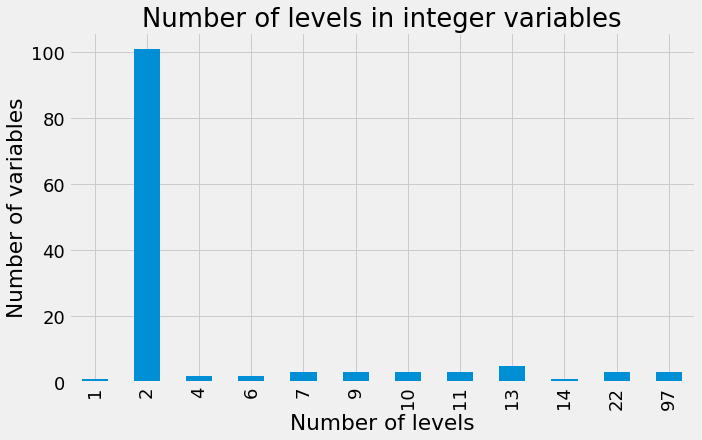

In [127]:
(train
    .select_dtypes(np.int64)
    .nunique()
    .value_counts()
    .sort_index()
    .plot.bar(figsize=(10,6), linewidth=2)
);

plt.xlabel("Number of levels")
plt.ylabel("Number of variables")
plt.title("Number of levels in integer variables")

Over 100 integer variables are binary. A variable has only 1 level (constant). And a few have 4 and 6 levels (could be treated as categorical?) 

**Let's take a look at some of these "binary integer variables"**

In [128]:
(train
    .select_dtypes(np.int64)
    .nunique()
    .reset_index(name="count")
    .query("count==2")
    .sample(10))

,index,count
28,pisocemento,2
102,instlevel8,2
23,paredmad,2
36,techootro,2
37,cielorazo,2
43,noelec,2
19,paredblolad,2
59,elimbasu6,2
29,pisoother,2
90,parentesco12,2


- For many of these variables, they are metrics at the household level. For example, refrig gets 1 if the household has a refrigerator, and 0 otherwise.
- However, there are still boolean variables at the individual level. We need to identify those and aggregate them to the household level (more on this later).

## Bivariate analysis of continuous variables
- Plot the distribution all continuous variables
- Specifically, we want to plot the distribution of each continuous variable grouped by the outcome variable (poverty levels) to see if there is relationship between the continuous variable with the outcome
- OrderDict is used to map the poverty levels to colors-- it keeps the keys and values in the same order as we specify them.
- With the below plots, we can see if there are differences in the distribution of continuous across poverty level

In [129]:
# Color mapping
colors = OrderedDict({1:"red", 2: "yellow", 3:"purple", 4:"blue"})

# Poverty label mapping
poverty_label_mapping = OrderedDict({1:"extreme",2:"moderate",3:"vulnerable",4:"not vulnerable"})

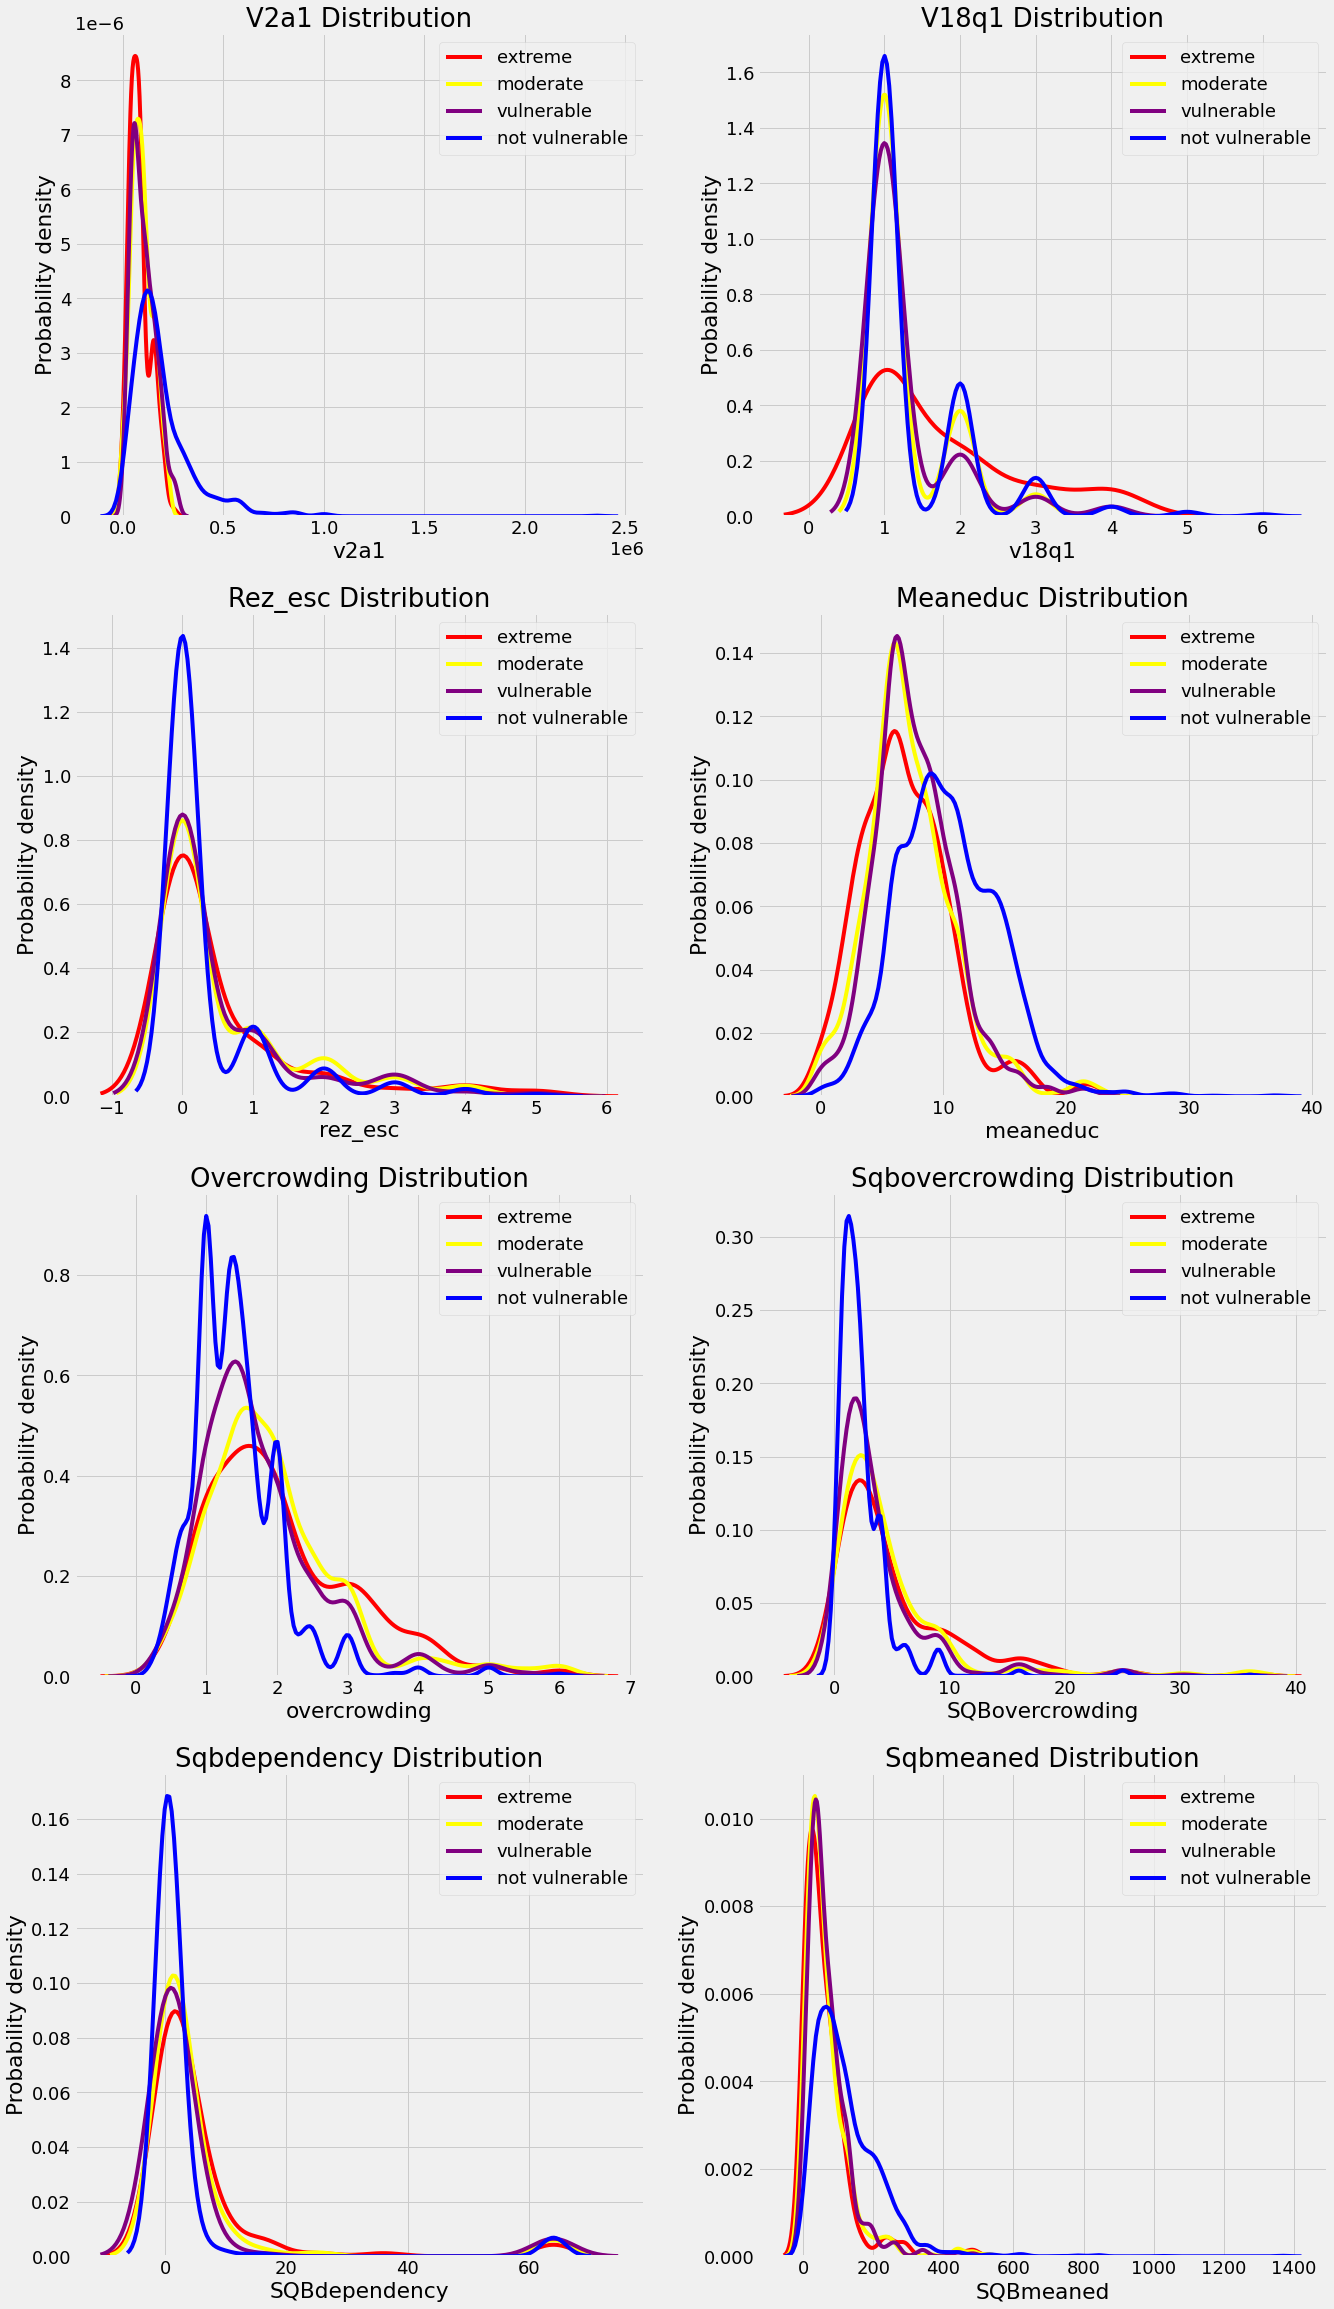

In [130]:
# Distribution plots of continuous varibales, grouped by poverty levels

fig = plt.figure(figsize=(20,16))
for i, var in enumerate(train.select_dtypes("float")):
    ax = plt.subplot(4,2,i+1) # 8 subplots in total
    
    # iterate through the poverty levels
    for poverty_level, color, in colors.items():
        # pdf plot
        sns.kdeplot(
            train.loc[train["Target"]==poverty_level, var].dropna(),
            ax = ax,
            color = color,
            label = poverty_label_mapping[poverty_level]
        )
        
        plt.title(f"{var.capitalize()} Distribution")
        plt.xlabel(f"{var}")
        plt.ylabel("Probability density")
        plt.legend(loc="best")
        
plt.subplots_adjust(top=2)

- To quantify the (linear) relationships between continuous variables and Target, we will calculate correlations. However, from these plots, we already get a sense of variables may be "relevant" to a model. 
- For example, higher meaneduc (average education of the adults in the household) appears to be associated with lower poverty level.
- Households with higher levels of poverty appears to have more "overcrowding".

## Categorical variables
- There are 5 string variables: we want to see how these variables needs to be recoded

In [131]:
train.select_dtypes("object").head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


The Id and Idhogar and the keys for individual and household, respectively. Therefore, these variables are expected to be string columns. We will next look at `dependency`, `edjefe`, and `edjefa`.

**dependency**
- The dependency rate, computed by the number of household members <19 or >54, divided by the number of household members between 19 and 64.
- `dependency` is actually a continuous variable, I need to map "yes" to 1, and "no" to0

In [132]:
train.dependency.value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.83333331      11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

**edjefe** 
- years of education of male head of household. It is a continuous variable: I need to map yes = 1 and no = 0

In [133]:
train.edjefe.value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

**edjefa**
- years of education of female head of household, it is a continuous variable. I need to map yes = 1 and no =0

In [134]:
# Map yes to 1, and no to 0 for these 3 variables. I need to do it for both the train and test set
# Then I need to convert the columns to numeric

def obj_to_cont(*vars,
                df:pd.DataFrame,
                mapping:Dict[str,int])->pd.DataFrame:
    data = df.copy()
    vars = list(vars)
    data[vars] = data[vars].replace(mapping)
    data[vars] = data[vars].apply(pd.to_numeric)
    
    return data

In [135]:
train = obj_to_cont("dependency","edjefa","edjefe",df=train, mapping={"yes":1, "no":0})
test = obj_to_cont("dependency","edjefa","edjefe",df=test, mapping={"yes":1, "no":0})

In [136]:
# Check
train[["dependency","edjefa","edjefe"]].dtypes

dependency    float64
edjefa          int64
edjefe          int64
dtype: object

### Relationship between dependency, edjefa, and edjefe and poverty level
- I expect households with more dependencies, and less educated female/male household head to have higher levels of poverty
- Let's use box plots to visualize this. for each variable, I will plot boxplot of the variable, grouped by each poverty level.

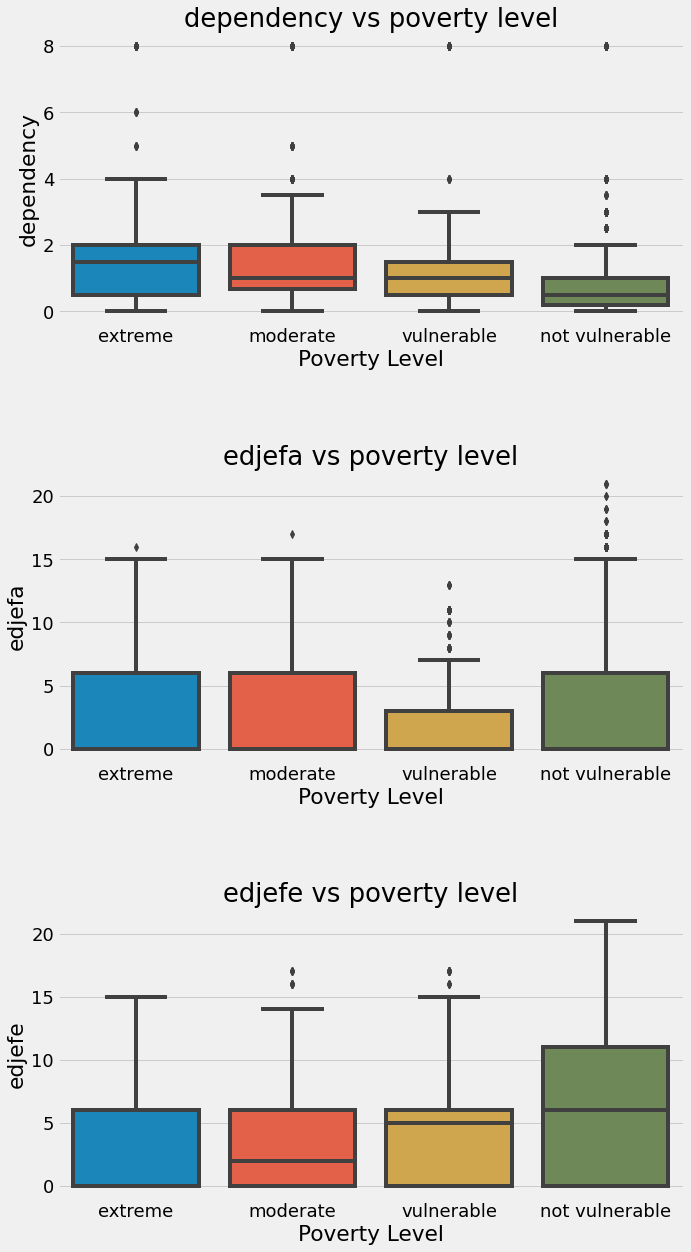

In [137]:
vars = ['dependency', 'edjefa', 'edjefe']

fig, axes = plt.subplots(3,1,
                        figsize=(10,20))
for i, var in enumerate(vars):
    
    sns.boxplot(x="Target",
                y=var,
                ax = axes[i],
                data= train)
    
    # Formatting
    axes[i].set_xlabel("Poverty Level")
    axes[i].set_ylabel(f"{var}")
    axes[i].set_title(f'{var} vs poverty level');

    axes[i].set_xticks([x - 1 for x in poverty_label_mapping.keys()], 
               list(poverty_label_mapping.values()))
    
# adjust whitespace between subplots
plt.subplots_adjust(hspace=0.5)


The boxplots show that higher head of household education and lower levels of dependencies are associated with lower levels of poverty. We can consider including `dependency`, `edjefa`, `edjefe` in our model as they may be predictive of `Target`.

### Joining train and test set
- As we perform more data formatting/cleaning, it might be easier to join train and test sets into a single dataframe so that cleaning/reformating can be applied to both dataframes. I have to be careful however to ensure no data leakage. For most data engineering steps (e.g., missing imputation, scaling, some transformation that involves parameters learning) I need to use a pipeline to learn parameters from the train set, and only apply the transformer to the test set.
- In production, I should encapsulate the cleaning/formating steps into functions so that I can apply them to the train set and new/unknown data.

In [138]:
# Create a new column called "Target" in the test set and set it to np.nan
# The reason is that both train and test sets must have the same columns for them to be row concat
test["Target"]=np.nan
# Row concat train and test
data = pd.concat([train,test], ignore_index=True, axis="index")
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10,0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12,0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11,0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11,0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4.0


### The distribution of Target
- It's important to check the distribution of the DV for classification problem to see if we have an imbalanced classification problem
- We only look at the distribution of DV for heads of households (rows with parentescol==1)
- This is because if we look at the distribution of the DV for the entire dataset, it might be "noisy". There are some household whose memebrs have inconsistent DV (e.g., some members have poverty level 1 and others have 2). NOTE: for these hese cases, we will use the poverty level of the head of household as the reference and make all memebers of the household to have the same poverty level.

In [139]:
# Get a dataframe with heads of household only
df_head = data.query("parentesco1==1").copy()
df_head.shape

(10307, 143)

There are 10307 heads of household. Note that some households are missing "heads of household".

In [140]:
# Get train set with heads of household only
train_head = df_head.loc[df_head["Target"].notnull(),["Target","idhogar"]]

In [141]:
train_head.head()

,Target,idhogar
0,4.0,21eb7fcc1
1,4.0,0e5d7a658
2,4.0,2c7317ea8
5,4.0,2b58d945f
8,4.0,d6dae86b7


In [142]:
# Let's look at the distribution of Target
train_head.Target.value_counts().sort_index()

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

In [143]:
colors

OrderedDict([(1, 'red'), (2, 'yellow'), (3, 'purple'), (4, 'blue')])

([<matplotlib.axis.XTick at 0x13a5d1ea0>,
 [Text(0, 0, 'extreme'),
  Text(1, 0, 'moderate'),
  Text(2, 0, 'vulnerable'),
  Text(3, 0, 'not vulnerable')])

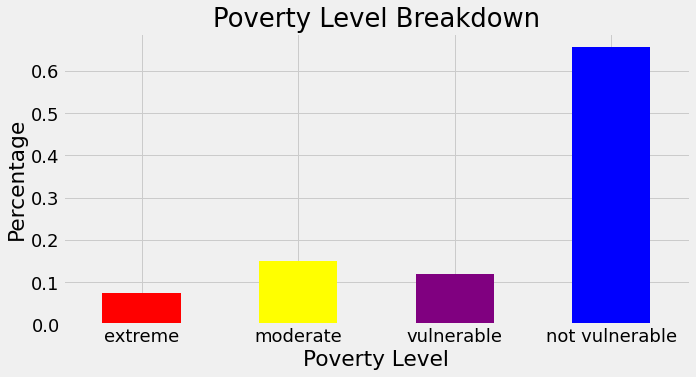

In [144]:
# We can visualize this in a bar plot
train_head.Target.value_counts(normalize=True).sort_index().plot.bar(
    figsize= (10,5),
    color = colors.values(),
    linewidth=2
)

# formatting
plt.xlabel("Poverty Level")
plt.ylabel("Percentage")
plt.title('Poverty Level Breakdown');

plt.xticks([x - 1 for x in poverty_label_mapping.keys()], 
           list(poverty_label_mapping.values()), rotation = 0)

- We have an imbalanced classification problem where `not vulnerable` is the majority class that comprise of over 60% of the train set. The level that we are most interested in `extreme` is only 7% of the train set.
- To deal with imbalanced classification, we can 1) upsample the minority classes and downsample the majority class, 2) Use cost sensitive learning (implementation is available in sklearn for some models like Random Forest). Basically error in predicting of some examples (e.g., `extreme`) is more important than others. I set weights accordingly, and 3) use weighted f1-score, and/or PRC. I will give more weights to minority classes in computing the f1-score; otherwise "poor performance" in predicting `extreme` will not matter as much since it only comprises <10% of the sample. I will end up having poor model performance for predicting `extreme` and yet this is not reflected in the f1-score.

## Data reformatting
- For this problem, some of the labels are not correct because individuals in the same household have a different poverty level. We're not told why this may be the case, but we are told to use the head of household as the true label.

**NOTE: we only deal with train dataset since only train has the Target column.**

In [145]:
# Let's find households whose members has consistent Target
consistent = train\
    .groupby("idhogar")\
    .Target\
    .apply(lambda x:x.nunique()==1) # only one unique Target value
consistent.head()

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
Name: Target, dtype: bool

In [146]:
consistent.value_counts()

True     2903
False      85
Name: Target, dtype: int64

There are 85 households with inconsistent Target.

In [147]:
# Flip the boolean to get a boolean mask for inconsistent households
inconsistent =(consistent==False)
# Filter only the inconsistent household (True rows in the inconsistent Series)
inconsistent = inconsistent.loc[inconsistent]
inconsistent.head()

idhogar
0172ab1d9    True
03f4e5f4d    True
0511912b6    True
078a0b6e2    True
09e25d616    True
Name: Target, dtype: bool

In [148]:
# Get the first household
inconsistent.index[0]

'0172ab1d9'

In [149]:
# Take a look at the inconsistency of this household
train.loc[train["idhogar"]==inconsistent.index[0],['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


Some members have Target =2 and others have Target =3. Since the head of household is 3, so we should set the Target of all members of this household to 3.

### Before we do that, let's examine familiies with no head of household
- We see that the number of rows with parentescol1 = 1 (heads of households) is less than the number of households (unique values idhogar) in the train set. This indicates that some households do not have heads. 

In [150]:
# If I sum the parentesco1 for each household, I expect the sum to be 1. If it's 0, that means
# there are no heads for that household
parentesco1_sum = train.groupby("idhogar").parentesco1.sum()

In [151]:
parentesco1_sum.value_counts()

1    2973
0      15
Name: parentesco1, dtype: int64

There are 15 households with no head of households.

**Find households with no head, with members whose Target is different**
- We probably need to remove these individuals from the train set since we don't have a good way to set a consistent Target value

In [152]:
# household keys for households with no heads
household_no_heads = parentesco1_sum.loc[parentesco1_sum==0].index.values
household_no_heads # 15 households

array(['03c6bdf85', '09b195e7a', '1367ab31d', '1bc617b23', '374ca5a19',
       '61c10e099', '6b1b2405f', '896fe6d3e', 'a0812ef17', 'ad687ad89',
       'b1f4d89d7', 'bfd5067c2', 'c0c8a5013', 'd363d9183', 'f2bfa75c4'],
      dtype=object)

In [153]:
(train
     .loc[train["idhogar"].isin(household_no_heads),:] # filter households with no heads (15 of them)
     .groupby("idhogar")
     .Target
     .apply(lambda x: x.nunique()==1) # identify household with consistent Target
     .value_counts())
     

True    15
Name: Target, dtype: int64

All households with no heads has consistent Target. So we don't have to worry about having to impute a consistent Target for households with inconsistent Target AND no head.

### Imputing consistent Target for all members of a household based on the Target of its head

In [154]:
# These households (85 of them) has inconsistent Target
# Here I show the first 10 households
inconsistent.index[:10]

Index(['0172ab1d9', '03f4e5f4d', '0511912b6', '078a0b6e2', '09e25d616',
       '0f3e65c83', '0f9494d3a', '15a891635', '17fb04a62', '18832b840'],
      dtype='object', name='idhogar')

In [155]:
for hh in inconsistent.index:
    # Get the reference Target for these households (the Target of its head)
    ref_target = train.query("idhogar ==@hh and parentesco1==1.0")["Target"]
    # Set the ref target for all members of the household
    train.loc[train["idhogar"]==hh,"Target"] = ref_target

In [156]:
# Check to see if we have consistent Target for all households
# I see that all 2988 households have members that only have 1 unique target value
train.groupby("idhogar").Target.apply(lambda x:x.nunique()==1).value_counts()

True    2988
Name: Target, dtype: int64

Strictly speaking, we don't really need this reformating step since we are only going to use heads of household and data at the household level to train our model, and then setting the predictions of each household to all of its members (if we want to make predictions at the individual level).

## Examine the extent of missingness and handle some missingness cases
- We will only handle cases where missing values could be imputed with 0 (because of definition of variable).
- See if we can drop variables/rows due to high level of missingness.
- For all other cases, we need to perform imputation in a data pipeline to avoid data leakage.

In [157]:
pp.extent_missingness(data)

rez_esc            0.825457
v18q1              0.762218
v2a1               0.726154
Target             0.713974
SQBmeaned          0.001077
                     ...   
abastaguadentro    0.000000
cielorazo          0.000000
techootro          0.000000
techocane          0.000000
eviv2              0.000000
Length: 143, dtype: float64

- Target has a lot of NAs, but this is mainly because we made all rows in the test dataframe to have NA target (test didn't have this column before) before rbinding it to train.
- However, we see that rez_esc, v18q1, and v2a1 have large proportion of missingness. Let's examine in more details.

### v18q1: number of tablets
- Number of tablets owned by a family
- It is a household level variable (where all members of a household should have the same number)
- We only need to look at this variable for heads of households

In [158]:
def plot_value_counts(df:pd.DataFrame, col:str, heads_only:bool=False):
    
    if heads_only:
        df = df.query("parentesco1==1").copy()
        
    plt.figure(figsize=(8,6))
    (df[col]
     .value_counts()
     .sort_index()
     .plot.bar(color="green",
               edgecolor='k',
               linewidth=2))
     
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f"{col}")

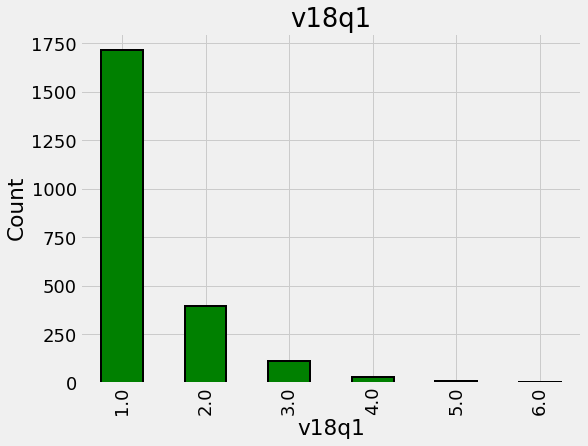

In [159]:
plot_value_counts(df=data, col="v18q1", heads_only=True) 

- It seems that most households own 1 tablet. But it's strange that we don't see any households with 0 tablets. It could be that households with NA for this variable are the ones who own 0 tablets. In this case, NA could simply be recoded to 0.
- To check our hypothesis is true, I group individuals by another variable called v18q (a boolean that takes on 1 if family owns 1 or more tablet, and 0 otherwise). I expect individuals in the v18q==1 group should have no NAs for v18q1, and ALL individuals in the v18q==0 group would have NAs for v18q1.

In [160]:
(data
     .groupby("v18q")
     .v18q1
     .apply(lambda x: 100*x.isnull().mean()))

v18q
0    100.0
1      0.0
Name: v18q1, dtype: float64

100% of individuals in the v18q==0 group has NA and none in the v18q==1 group. Therefore, this confirms our hypothesis and we can simply impute NA to 0 for v18q1.

In [161]:
data["v18q1"] = data["v18q1"].fillna(0)

### v2a1: monthly rent payment
- Monthly rent payment for a household. This is a household level variable
- It seems strange to see no "0" monthly rent payment since some households might actually own the house that they live in. 
- Again, we hypothesize that households with NA for v2a1 are those who own houses and therefore pay 0 rent

In [162]:
data.v2a1.value_counts()

100000.0    581
150000.0    579
200000.0    511
120000.0    379
50000.0     364
           ... 
118097.0      1
195019.0      1
191000.0      1
268000.0      1
56000.0       1
Name: v2a1, Length: 302, dtype: int64

There are a set of variables that indicate home ownership, they all start with "tipoviv"

In [163]:
# variables that indicate home ownership
ownership_vars = [x for x in data.columns if x.startswith("tipovivi")]
ownership_vars

['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']

tipoviviXXX key:
- tipovivi1: Owns and paid off
- tipovivi2: Owns and paying
- tipovivi3: Rented
- tipovivi4: precarious
- tipovivi5: Other

In [164]:
# Filter rows that have missing v2a1, and then look at its tipoviviX columns 
(data
    .loc[data["v2a1"].isnull(), ownership_vars]).head()

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


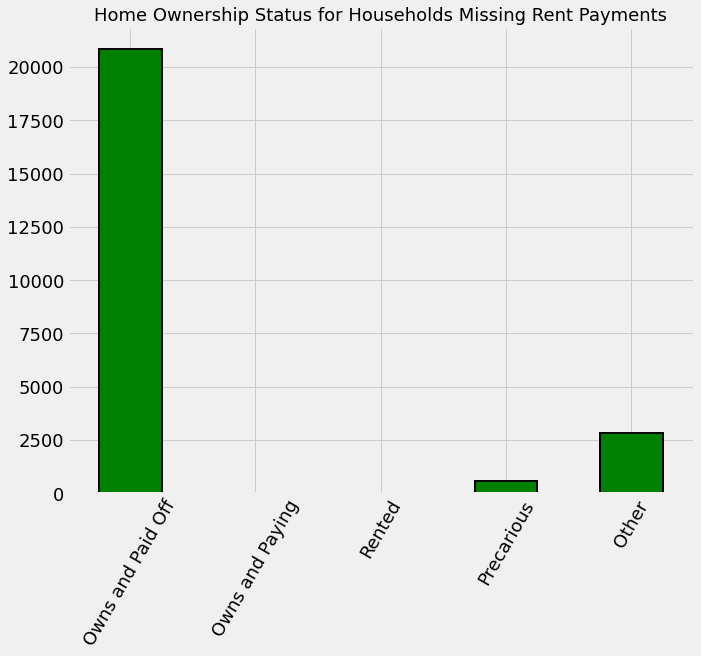

In [165]:
(data
    .loc[data["v2a1"].isnull(), ownership_vars]
    .sum(axis="index") # colsum
    .plot.bar(figsize=(10,8),
              color = "green",
              edgecolor="k",
              linewidth = 2))

plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

- Most individuals with NAs for v2a1 do not pay rent because they own and has paid off their houses.
- For individuals who have Nas for v2a1, but do not "own and paid off" their houses, we will leave their NAs as is (will be imputed later on with other methods).

In [166]:
# Fill in households who own houses and have NA monthly rental payment
data.loc[data['tipovivi1'] == 1, 'v2a1']=0

In [167]:
# Create missing monthly rent payment flag
data["v2a1_missing"] = data["v2a1"].isnull()

In [168]:
data.v2a1_missing.value_counts(normalize=True) # 10% NAs

False    0.897675
True     0.102325
Name: v2a1_missing, dtype: float64

### rez_esc: years behind in school
- This is a household-level variable.
- For households with NA for rez_esc, it is possible that the household has no children who are currently in school.
- We can test out this hypothesis by finding the (mean) age of children in households who have missing values for rez_esc and the (mean) age of children in households who do not have missing value for rez_esc

In [169]:
data.query("rez_esc.notnull()")["age"].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

We see that the oldest age for households with NO missing value for rez_esc is 17 (last year of high school)

In [170]:
data.loc[data["rez_esc"].isnull(),"age"].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

We see that the oldest age for households with missing value for rez_esc is 97 and the mean age is 39. So these seems to be adult children.

- From the variable description, this variable is only defined for individuals between 7 and 19. Individuals outside of this range should have 0 since they are not attending school and therefore should not be behind school.
- For this variable, if the individual is over 19 and they have a missing value, or if they are younger than 7 and have a missing value we can set it to zero. For anyone else, we'll leave the value to be imputed and add a boolean flag.

In [171]:
# If individual is over 19 or younger than 7 and have NA rez_esc, we set it to 0
data.loc[((data["age"]>19) | (data["age"]<7)) & (data["rez_esc"].isnull()), "rez_esc"]= 0

In [172]:
# Add a flag for individuals between 7 and 19 with NA rez_esc
data["rez_esc_missing"] = data["rez_esc"].isnull()

There is also one outlier in the `rez_esc` column. From the variable description, the maximum value for this variable is 5. Therefore, any values above 5 should be set to 5.

In [173]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

In [174]:
data.rez_esc.isnull().sum()

1161

## Bivariate analysis (v18q1, v2a1, rez_esc,  vs Target)

In [360]:
def cat_cat_stackplot(df, x, y):
    data = df.copy()
    
    # Compute the percentage of each level of x for each y group
    counts = (data
          .groupby(y)[x]
          .value_counts(normalize=True)
          .mul(100)
          .reset_index(name="percent"))
    
    # I need to convert this dataframe from long to wide
    counts_wide = counts.pivot(index = "Target", columns = x, values= "percent")
    counts_wide=counts_wide.reset_index()
    
    # Stack bar plot
    
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(2,2,1) 
    counts_wide.plot(x=y, 
                     kind='barh', 
                     stacked=True,
                     ax = ax1,
                     title=f"Stacked Bar Graph: {y} X {x}")

    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

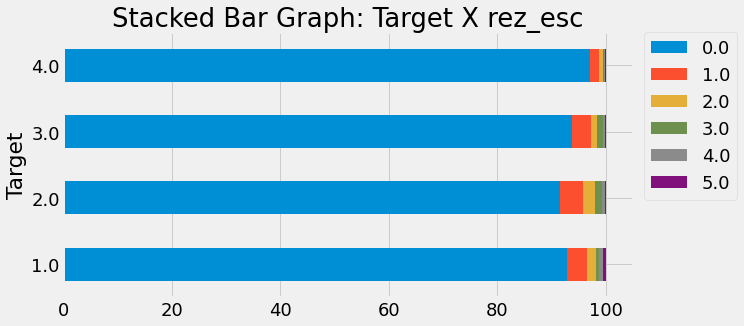

In [361]:
cat_cat_stackplot(data, "rez_esc", "Target")

There seems to be more households with extreme or moderate levels of poverty with members who are behind in school (by at least 1 year) than households that are vulnerable or not vulnerable.

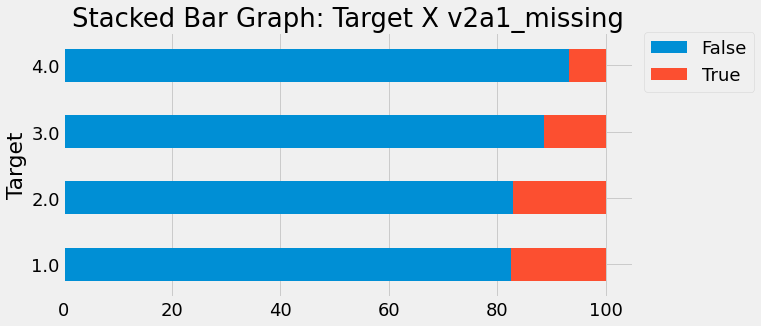

In [362]:
# Amongst individauls in each poverty poverty, what is the percentage of individuals with v2al_missing?
# With rez_esc_missing?
cat_cat_stackplot(data, "v2a1_missing", "Target")

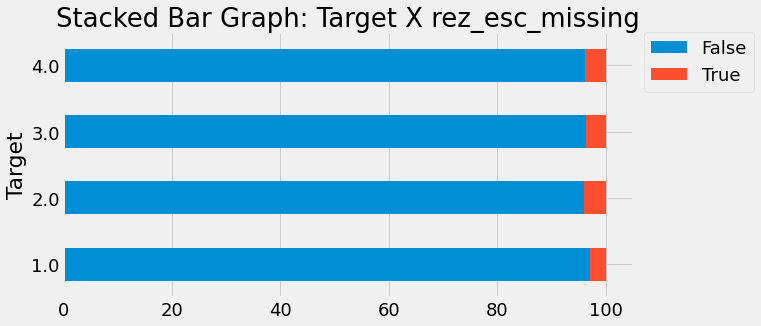

In [363]:
cat_cat_stackplot(data, "rez_esc_missing", "Target")

- Around 20% of individauls with moderate or extreme poverty levels have v2a1 missing.
- A small proportion (around 3%) of indivdiuals in each poverty level have rez_esc missing.

## Variable Categories
- We want to perform some feature engineering. For example, aggregating individual-level variables to the household level. This is because we are developing ML models at the household level. But before doing that, we need to categorize the variables in the dataset.

There are several different categories of variables:

1. Individual Variables: these are characteristics of each individual rather than the household
    * **Boolean**: Yes or No (0 or 1)
    * **Ordinal**: categorical variables with an ordering
2. Household variables
    * **Boolean**: Yes or No
    * **Ordinal**: categorical variables with an ordering
    * **Continuous** 
3. **Squared Variables**: derived from squaring variables in the data (done for us already by the organizers of Kaggle)
4. Id variables: identifies the data and should not be used as features


I manually create different lists for each variable category. In production, these lists would go into a config file.

In [364]:
# These should go into a yaml file as they are project configs
id_ = ['Id', 'idhogar', 'Target']

In [365]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc_missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [366]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1_missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [367]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [368]:
# Let's check to make sure we have no repeated variables in our lists
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_
Counter(x)

Counter({'v18q': 1,
         'dis': 1,
         'male': 1,
         'female': 1,
         'estadocivil1': 1,
         'estadocivil2': 1,
         'estadocivil3': 1,
         'estadocivil4': 1,
         'estadocivil5': 1,
         'estadocivil6': 1,
         'estadocivil7': 1,
         'parentesco1': 1,
         'parentesco2': 1,
         'parentesco3': 1,
         'parentesco4': 1,
         'parentesco5': 1,
         'parentesco6': 1,
         'parentesco7': 1,
         'parentesco8': 1,
         'parentesco9': 1,
         'parentesco10': 1,
         'parentesco11': 1,
         'parentesco12': 1,
         'instlevel1': 1,
         'instlevel2': 1,
         'instlevel3': 1,
         'instlevel4': 1,
         'instlevel5': 1,
         'instlevel6': 1,
         'instlevel7': 1,
         'instlevel8': 1,
         'instlevel9': 1,
         'mobilephone': 1,
         'rez_esc_missing': 1,
         'rez_esc': 1,
         'escolari': 1,
         'age': 1,
         'Id': 1,
         'idhogar': 

In [369]:
print(f"There are no repeats: {np.all(np.array(list(Counter(x).values())))==1}")

There are no repeats: True


In [370]:
print(f"We covered every variable in the dataframe: {len(x)==data.shape[1]}")

We covered every variable in the dataframe: True


## Squared variables
- We will remove all of the squared variables. 
- This is because we will rely on nonlinear models (e.g., tree-based models, which are nonlinear and takes into account interaction between features). Unless we want to use models that are "linear in parmaeters" such as polynomial regression, we have little use of the squared features.

In [371]:
data = data.drop(columns = sqr_)
data.shape

(33413, 136)

## Id variables
- We will keep them in the dataframe for now because we need them for idenfication (e.g., identify households)
- We will not use them when training our models

## Household level variables
- "heads" is the rbind of train and test data, but we filter rows of heads of households only (parentescol==1)
- We only look at the household level variables in heads (variables in hh_bool, hh_count, hh_ordered)

In [372]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

For most of the household level variables, we can simply keep them as is: since we want to make predictions for each household, we use these variables as features. However, we can also remove some redundant variables and also add in some more features derived from existing data.

### Removing redundant household variables

Let's take a look at the correlations between all of the household variables. If there are any that are too highly correlated, then we might want to remove one of the pair of highly correlated variables.

The following code identifies any variables with a greater than 0.95 absolute magnitude correlation.

Although multicollinearity is not an issue for tree-based models, we want to trim down the number of features (that do not add additional information) in our model to reduce training time and reduce model complexity. 

In [373]:
# Create correlation matrix
corr_matrix = heads.select_dtypes(np.number).corr()
corr_matrix

,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,v18q1,tamhog,tamviv,hhsize,hogar_nin,hogar_adul,hogar_mayor,hogar_total,bedrooms,qmobilephone
Target,1.000000,-0.136275,-0.096313,0.068230,0.119607,0.254469,-0.078851,-0.104545,-0.209131,-0.096893,-0.152979,-0.040128,-0.039861,0.005231,0.275452,0.016832,-0.054463,-0.114144,-0.103487,0.014357,0.032872,-0.026240,0.031516,0.295249,0.062961,-0.046518,-0.055818,0.021908,-0.009437,-0.051036,-0.007696,-0.049932,0.097592,-0.062316,-0.083835,-0.017669,-0.054739,0.158804,-0.083063,-0.162796,0.156930,-0.060286,-0.142433,-0.041221,NaN,0.023812,-0.208170,-0.162652,0.280947,-0.209181,-0.128644,0.261142,-0.217908,-0.174310,0.293540,-0.022316,0.131069,0.032834,-0.109057,-0.095326,0.173324,0.137407,0.175124,-0.019746,-0.085646,-0.084516,-0.079679,-0.047958,0.089509,-0.089509,0.161353,-0.126465,0.235687,0.052310,0.333652,-0.234954,0.201019,-0.186530,0.086395,-0.023307,-0.209479,-0.038193,-0.142157,-0.260917,0.036476,-0.111489,0.197493,-0.111557,-0.122554,-0.111557,-0.266309,0.127904,-0.025173,-0.111557,0.135203,0.168685
hacdor,-0.136275,1.000000,0.593867,-0.086701,-0.066409,-0.113787,0.026165,0.019816,0.110713,0.122610,0.068846,0.086632,-0.007015,-0.005960,-0.143259,-0.005960,0.026892,0.116650,0.026372,-0.036627,-0.007641,-0.008595,-0.006613,-0.148678,-0.036094,0.036627,0.005125,-0.004565,-0.003695,-0.002945,0.006355,0.064991,0.006987,-0.030309,0.053491,-0.007932,-0.012058,-0.035395,0.023407,0.033674,-0.060450,0.029765,0.051689,0.007229,-0.001652,-0.006817,0.146991,0.037738,-0.127219,0.112619,0.047893,-0.119760,0.151133,0.059861,-0.148503,-0.083256,-0.043135,0.046399,0.121261,0.072329,-0.054428,-0.041849,-0.054110,0.009782,0.027159,-0.008010,0.037814,0.030319,-0.009123,0.009123,-0.019910,0.019191,-0.047917,-0.027628,-0.092837,0.620093,-0.197812,0.243406,0.050627,0.175272,0.219364,0.095605,0.191594,0.302703,0.099775,0.246122,-0.054685,0.246793,0.297433,0.246793,0.295757,0.043431,-0.058321,0.246793,-0.189177,0.026514
hacapo,-0.096313,0.593867,1.000000,-0.123276,-0.075336,-0.094350,0.022254,0.007634,0.089127,0.134901,0.042265,0.118369,-0.005219,-0.004434,-0.120922,-0.004434,-0.002458,0.115475,0.023931,-0.047382,-0.007023,-0.006394,-0.004920,-0.131246,-0.038001,0.035262,0.013710,-0.022503,-0.002749,0.002857,0.023222,0.105027,-0.013006,-0.027034,0.089556,-0.005901,0.002071,-0.028908,0.011194,0.042592,-0.056761,0.030683,0.045590,0.013695,-0.001229,-0.005071,0.133999,0.011774,-0.094734,0.112630,0.018830,-0.092966,0.153102,0.031874,-0.124185,-0.061334,-0.038374,0.030007,0.122973,0.050853,-0.039341,-0.035871,-0.055738,0.009390,0.029604,-0.005307,0.026064,0.041579,-0.012488,0.012488,-0.019566,0.011497,-0.039651,-0.026451,-0.088360,0.467570,-0.200073,0.188811,0.056090,0.150316,0.170801,0.063220,0.140345,0.235222,0.082186,0.194963,-0.047469,0.195462,0.252206,0.195462,0.223288,0.046811,-0.043296,0.195462,-0.126525,0.036755
v14a,0.068230,-0.086701,-0.123276,1.000000,0.145417,0.065795,0.002527,0.007668,-0.020410,-0.128082,-0.068496,-0.034484,0.003483,0.002960,0.094633,0.002960,-0.057915,-0.140181,-0.076321,0.047145,0.012098,0.004268,0.003284,0.087430,0.169428,-0.110830,-0.178016,0.034658,0.001835,-0.096564,-0.000137,-0.460629,0.022767,0.082497,-0.135782,0.003939,-0.125215,0.037976,0.000772,-0.0508

In [374]:
# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # k=0 if you want to include diagonal

In [375]:
# Find name of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.9)]

to_drop

['abastaguafuera',
 'coopele',
 'sanitario3',
 'energcocinar3',
 'area2',
 'tamhog',
 'tamviv',
 'hhsize',
 'hogar_total']

In [376]:
# These columns is correlated to at least one variable (row) with correlation >abs(0.9)
# Let's find out what variable pairs have abs(correlation)>0.9
# We will only look at tamhog

corr_matrix.loc[corr_matrix["tamhog"].abs()>0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


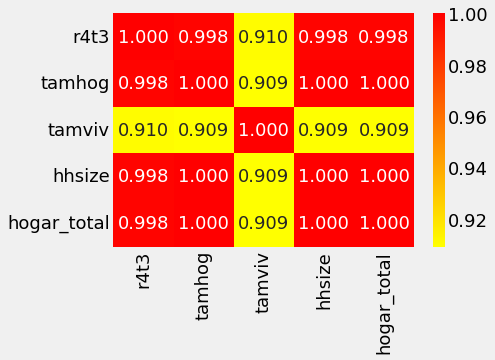

In [377]:
# Put the above in a heatmap
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

There are several variables here having to do with the size of the house:

* r4t3, Total persons in the household
* tamhog, size of the household
* tamviv, number of persons living in the household
* hhsize, household size
* hogar_total, # of total individuals in the household

These variables are all highly correlated with one another. In fact, `hhsize` has a perfect correlation with `tamhog` and `hogar_total`. We will remove these two variables because the information is redundant. We can also remove `r4t3` because it has a near perfect correlation with `hhsize`.

`tamviv` is not necessarily the same as `hhsize` because there might be family members that are not living in the household. Let's visualize this difference in a scatterplot.

In [378]:
# We keep hhsize and hogar_total, but drop the other three redundant variables
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

Text(0.5, 1.0, 'Household size vs the number of persons living in the household')

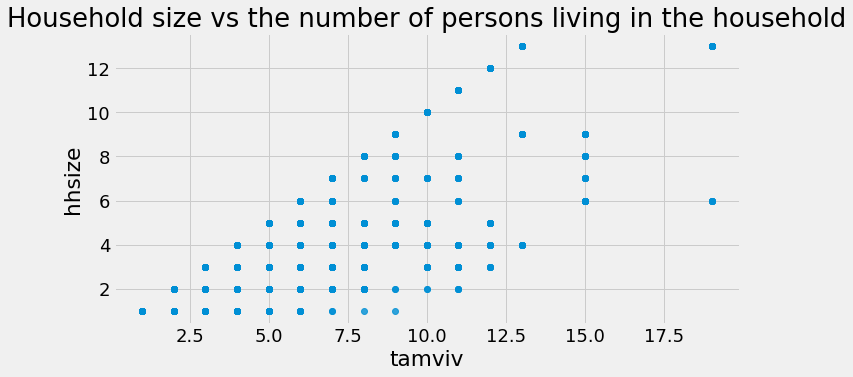

In [379]:
# Let's look at the relationship between hhsize and tamviv. I hypothesize
# that these two variables are not exactly the same since some members might not be living 
# in the same household (their corr is 0.909)
fig, ax1 = plt.subplots(figsize=(10,5))
sns.regplot(x = "tamviv",
            y= "hhsize",
            data = data,
            ax = ax1,
            fit_reg=False)

ax1.set_title("Household size vs the number of persons living in the household")

We see that there could be more people living in the household than there are in the family. A new feature could be difference between people living in a household and size of household.

In [380]:
heads["hhsize_diff"] = heads["tamviv"] - heads["hhsize"]

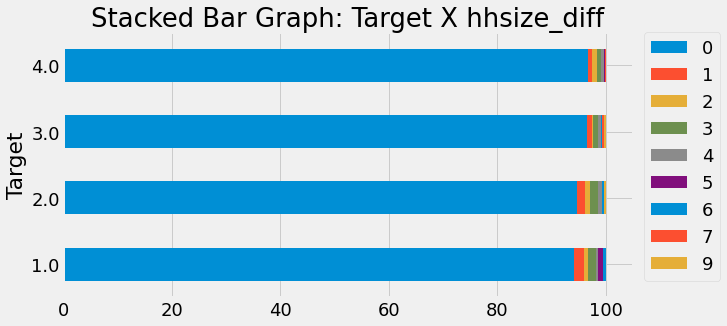

In [381]:
# Let's look at its relationship with Target
cat_cat_stackplot(heads,'hhsize_diff', 'Target')

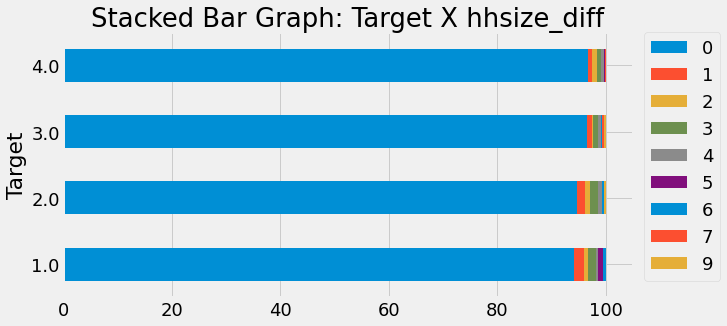

In [382]:
cat_cat_stackplot(heads, "hhsize_diff", "Target")

It seems that households with extreme or moderate poverty have more people living in the household than number of members in the household.

### Let's look at another column in the corr matrix with highly correated rows (coopele)
- coopele: family is getting electricity from cooperative
- public: family is getting electricity from CNFL, ICA, ESPH/JASEC
- There are actually two more variables related to electricity: noelec (no electricty) and planpri (get from private plant). But these variables are highly imbalanced, so their sample correlation with coopele should have high variance (not precise)

In [383]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]

,public,coopele
public,1.000000,-0.967759
coopele,-0.967759,1.000000


In [384]:
heads["noelec"].value_counts()

0    10258
1       49
Name: noelec, dtype: int64

In [385]:
heads["planpri"].value_counts()

0    10302
1        5
Name: planpri, dtype: int64

### Create a new ordinal variable called elec
- 0: noelec (no electricity)
- 1: coopele (from cooperative)
- 2: public public plant)
- 3: planpri (private plant)

In [386]:
conditions = [
    (heads["noelec"] ==1),
    (heads["coopele"]==1),
    (heads["public"]==1),
    (heads["planpri"]==1),
    (heads["noelec"]!=1 & (heads["coopele"] !=1) &
    (heads["public"] !=1) & (heads["planpri"] !=1)) # all categories is 0, so we set this to np.nan
]

values = [0,1,2,3, np.nan]

heads["elec"] = np.select(conditions, values)

In [387]:
heads["elec"].value_counts(dropna=False).sort_index()

0.0      49
1.0    1156
2.0    9082
3.0       5
NaN      15
Name: elec, dtype: int64

In [388]:
# Create a new "elec_missing" flag
heads["elec_missing"] = heads["elec"].isnull()
heads["elec_missing"].value_counts()

False    10292
True        15
Name: elec_missing, dtype: int64

### Let's look at another column in the corr matrix with highly correated rows (area2)
- area2: takes on 0 or 1. 1 means house is in a rural zone.
- This variable is highly correlated to area1, which is a variable that indicates the house is in a urban zone.

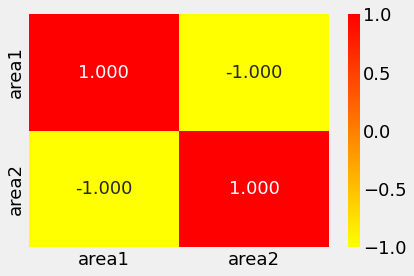

In [389]:
sns.heatmap(corr_matrix.loc[corr_matrix['area2'].abs() > 0.9, corr_matrix['area2'].abs() > 0.9],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

In [390]:
heads = heads.drop(columns = 'area2')

In [391]:
heads.groupby("area1")["Target"].value_counts(normalize=True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

A higher proprotion of households in urban area (area1==1) have no vulnerabilities (0.68 vs 0.58). And a smaller proportion of households in urban area have extreme poverty (0.06 vs 0.09)  

### Create new ordinal variables called walls, floor, and roof
- There are three sets of boolean variables related to the conditions of the walls, roof, and floor of the house (for each household):
    - bad, regular and good
- We can combine these sets boolean variables into 3 ordinal variables called walls, floor, and roof

In [392]:
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),
                           axis = 1)

heads = heads.drop(columns = ['epared1', 'epared2', 'epared3'])

In [393]:
# Create roof ordinal variable
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

In [394]:
# Createa floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)

heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])

### Create a new variable called "house_structure_score"
- Combine walls, roof, and floor to an overall metric called "house_structure_score" that measures the overall condition of the house for each household.

In [395]:
# Create new feature
heads['house_structure_score'] = heads['walls'] + heads['roof'] + heads['floor']

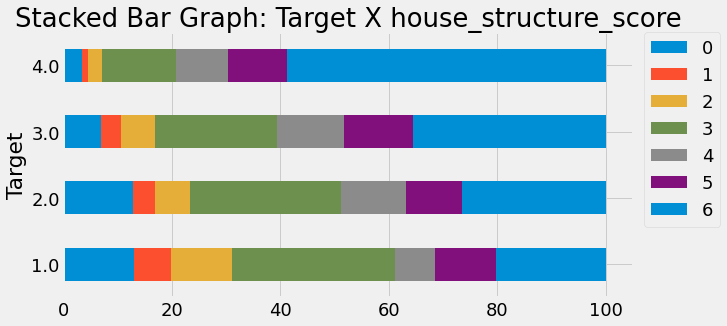

In [396]:
cat_cat_stackplot(heads, "house_structure_score", "Target")

More households with 0 house_structure_score have extreme vulnerabilites compared to households with no vulnerabilities.

### We will create another house-related variable called "poor_house_condition"
- Each household will get a point if they have:
    - no toilet
    - no electricity
    - no floor
    - no water service
    - no ceiling

In [397]:
# No toilet, no electricity, no floor, no water service, no ceiling
# True and False (booleans) can be treated as integer 1 and 0 by Python
# That's why they can be added to other columns with integer values

# Get 1 point each for poor_house_condition if one of the above condition is True
heads['poor_house_condition'] = (heads['sanitario1'] + 
                    (heads['elec'] == 0) + 
                     heads['pisonotiene'] + 
                     heads['abastaguano'] + 
                     (heads['cielorazo'] == 0))

<AxesSubplot:xlabel='poor_house_condition', ylabel='Target'>

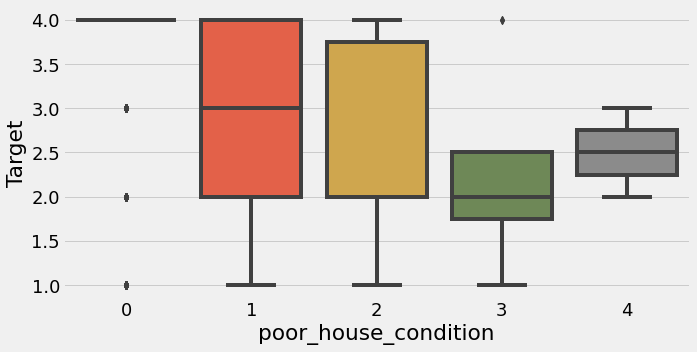

In [398]:
fig, ax1 = plt.subplots(figsize=(10,5))
sns.boxplot(x= "poor_house_condition",
               y= "Target",
               data = heads)

There seems to be an association between poor_house_condition and vulnerabilities.

### We create another variable called "amenities"
- A household gets a point each for having a refrigerator, computer, tablet, or TV

In [399]:
heads["amenities"] = heads["refrig"] + heads["computer"] + (heads["v18q1"]>0) + heads["television"]

In [400]:
heads["amenities"] = heads["refrig"] + heads["computer"] + (heads["v18q1"]>0) + heads["television"]

<AxesSubplot:xlabel='amenities', ylabel='Target'>

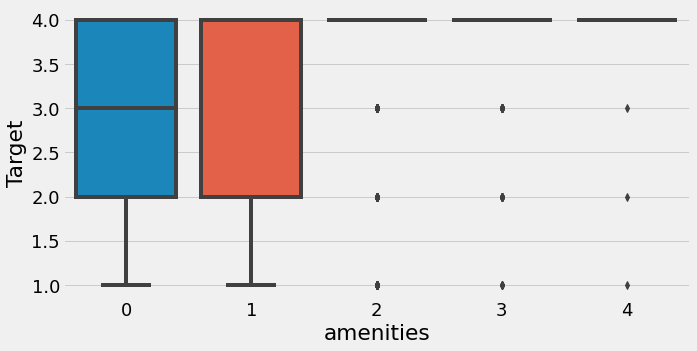

In [401]:
fig, ax1 = plt.subplots(figsize=(10,5))
sns.boxplot(x= "amenities",
               y= "Target",
               data = heads)

Households with no vulnerabilities on average have 2 or more amenitities.

## Creating per capita features
- We can create additional features by dividing certain number of "household items" (e.g., number of phones, or number of tablets) by the number of people living in the household (tamviv) to get "per_capita_num_phones"

In [104]:
heads['phones_per_capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets_per_capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms_per_capita'] = heads['rooms'] / heads['tamviv']
heads['rent_per_capita'] = heads['v2a1'] / heads['tamviv']

In [105]:
heads.shape

(10307, 99)

## Feature selection for household-level variables
- We will compute the Spearman correlation of every household variable with Target
- We prefer to use Spearman because it is a non-parametric technique that does not make assumption about the distribution and linearity of X and Y

In [105]:
# Use only train data in heads
train_heads = heads.loc[heads["Target"].notnull(),:].copy()

In [106]:
feats = [] # list of features
scorr = [] # list of Spearman correlation of feature with Target
pvalues = [] # p-value of the hypothesis test with Ho: estimated correlation of the feature with Target is 0 (uncorrelated)

for col in heads.columns:
    if heads[col].dtype !="object": # Only valid for numeric features
        feats.append(col)
        
        # Compute the Spearman correlation
        scorr.append(stats.spearmanr(train_heads[col], train_heads["Target"]).correlation)
        # Get the p-value 
        pvalues.append(stats.spearmanr(train_heads[col], train_heads["Target"]).pvalue)
        
scorrs = pd.DataFrame({"features":feats,
                       "scorr":scorr,
                       "pvalue":pvalues}).sort_values("scorr").dropna()

/Users/hfung/.pyenv/versions/3.8.0/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [107]:
scorrs.head()

,features,scorr,pvalue
91,poor_house_condition,-0.307326,4.682829e-66
62,dependency,-0.281516,2.792620e-55
79,hogar_nin,-0.236225,5.567218e-39
74,r4t1,-0.219226,1.112230e-33
8,pisocemento,-0.209387,8.270816e-31


In [108]:
scorrs.tail(10)

,features,scorr,pvalue
5,paredblolad,0.260219,3.262778e-47
14,pisomoscer,0.277387,1.167425e-53
88,roof,0.281961,1.859582e-55
92,amenities,0.294686,1.222236e-60
87,walls,0.298963,1.925370e-62
23,cielorazo,0.300996,2.611808e-63
89,floor,0.309638,4.466091e-67
93,phones_per_capita,0.337377,4.760104e-80
90,house_structure_score,0.338791,9.539346e-81
0,Target,1.000000,0.000000e+00


- As `poor_house_condition` increases, the poverty level also increases which makes sense because this was meant to show potential bad signs about a house. 
- The `hogar_nin` is the number of children 0 - 19 in the family which also makes sense: younger children can be financial source of stress on a family leading to higher levels of poverty. 

## Correlation heatmap
- For the heatmap, we'll pick 7 variables and show the correlations between themselves and with the target.

In [109]:
variables = ['Target', 'dependency', 'poor_house_condition', 'house_structure_score', 'meaneduc',
             'floor', 'r4m1', 'overcrowding']

In [110]:
# Compute the Pearson correlation of these variables amongst themselves and with Target
corr_mat = train_heads[variables].corr().round(2)

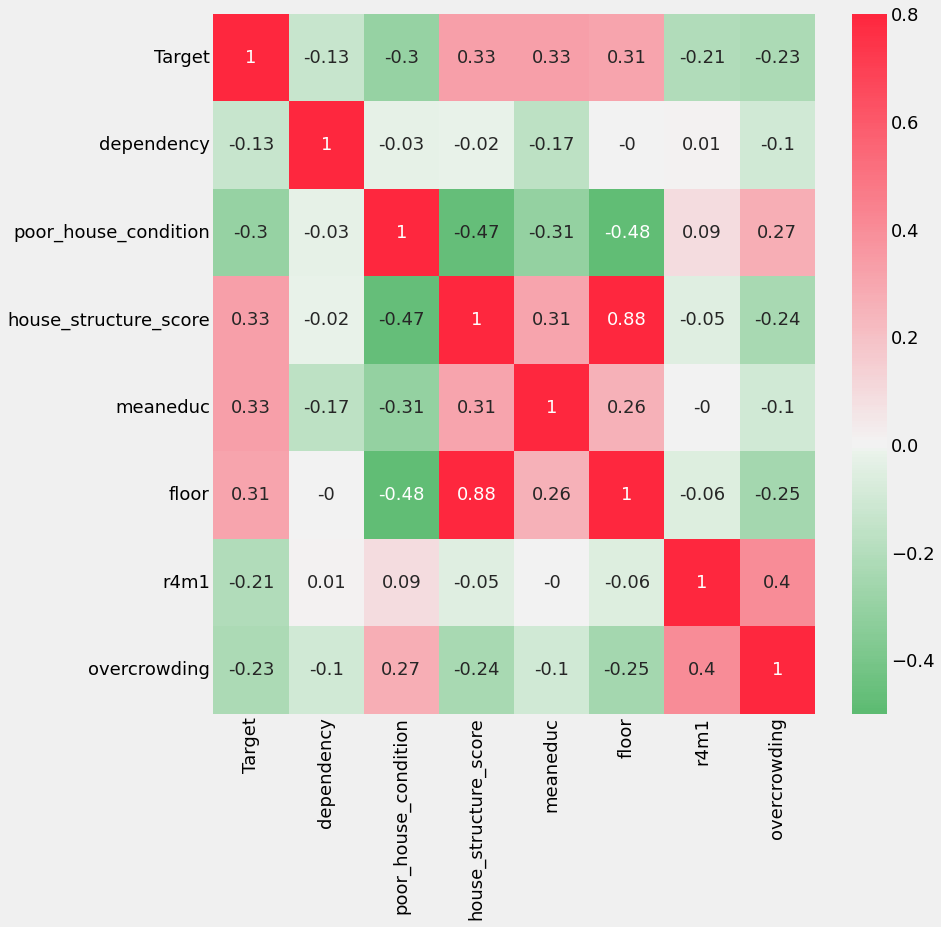

In [111]:
# heatmap color gradient
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)

fig,ax1=plt.subplots(figsize=(12,12))
sns.heatmap(corr_mat,
            vmin=-0.5, # min vertical value (pcorr)
            vmax =0.8, # max pcorr
            center = 0,
            cmap= rdgn,
            annot=True);

This plot shows us that there are a number of variables that have a weak correlation with the `Target`. There are also high correlations between some variables (such as `floor` and `house_structure_score`) which could pose an issue because of collinearity--but only if we are using linear regression model. 

## Features plot of household level variables
- We can make a plot of some of the most correlated variables with the Target.
- We will use sns.PairGrid to plot scatterplots of variables on the upper triangle, kde plots of individual variables on the diagonal, and 2D kde plots on the lower triangle.
- We will only choose a subset of features that are most correlated with the Target to include in the PairGrid

In [112]:
# data subset for plotting
plot_data = train_heads[['Target', 'dependency', 'house_structure_score',
                         'meaneduc', 'overcrowding']]

Text(0.5, 1.05, 'Feature Plots Colored By Target')

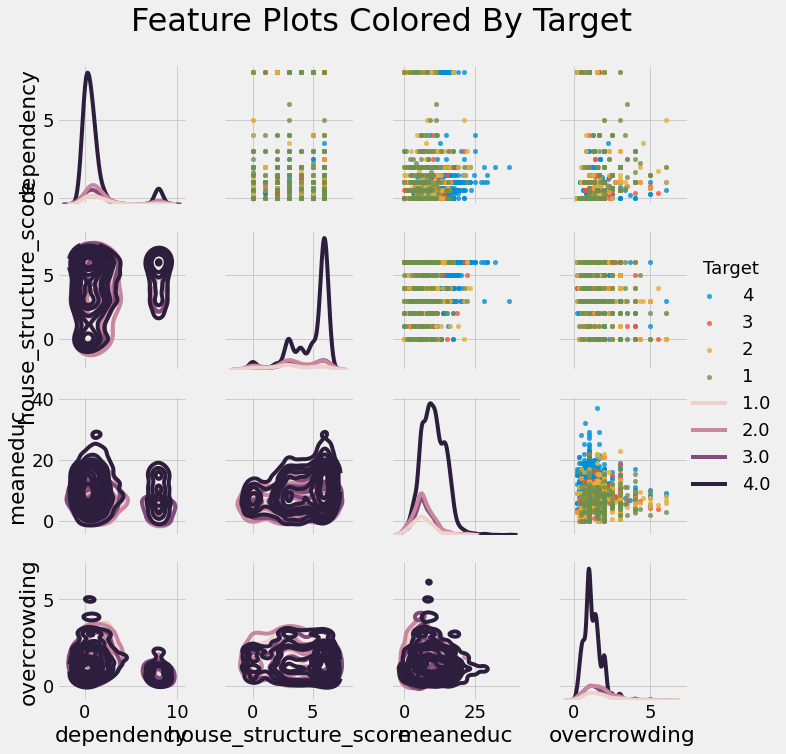

In [113]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(15,15)

# Create the pairgrid object
grid = sns.PairGrid(
    data = plot_data,
    diag_sharey=False,
    hue = "Target", hue_order = [4,3,2,1],
    vars = [x for x in list(plot_data.columns) if x!="Target"])

# Upper triangle is a scatterplot 
grid.map_upper(plt.scatter,
               alpha = 0.8, 
               s= 20)

# Diagonal is a histogram of individual variables (kde plot), separated by poverty level (different color)
grid.map_diag(sns.kdeplot)

# Bottom is a 2-D density plot (2-D kde)

# color gradient
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
grid.map_lower(sns.kdeplot, cmap =rdgn)

# Formatting
grid = grid.add_legend()
plt.suptitle("Feature Plots Colored By Target", size=32, y=1.05)

In [114]:
# Save the household-level variables
household_feats = list(heads.columns)
len(household_feats)

99

## Aggregating individual-level variables at the household level
- We will perform model training at the household level
- Therefore, we need to aggregate individual-level variables at the household level (groupby idhogar, then apply an aggregation function)
- Basically, I am summarizing individual-levels for each household.
- Once I engineered the new household level variables from individual-level variables, I will join it to the original dataframe that contains only household level variables.
- I need to find the appropiate aggregation method for each individual level variable.
- There are two types of individual level variables: Boolean (1 or 0 for True or False) and ordinal (discrete values with a meaningful ordering). 
- There are 40 individual level variables

In [115]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 40)

## Redundant Individual Variables

We can do the same process we did with the household level variables to identify any redundant individual variables. We'll focus on any variables that have an absolute magnitude of the correlation coefficient greater than 0.95.

- NOTE: I am not sure if we can look at correlation of boolean variables with Target
- We might need Point biserial correlation or logreg between continuous-categorical pairs.
- I created a function in hf_ds_lib for this.

In [116]:
# Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

female is simply the opposite of male, let's remove the male variable can keep female

In [117]:
ind = ind.drop(columns = "male")

### Creating Ordinal Variables

We can map existing boolean variables to an ordinal variable. Here we will focus on the `instlevel_` variables which indicate the amount of education an individual has from `instlevel1`: no level of education to `instlevel9`: postgraduate education. 

In [118]:
ind[[c for c in ind if c.startswith('instl')]].head()

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [119]:
# argmax return the index of the element in the array wtih the max value (1)
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)

In [120]:
ind['inst'].value_counts().sort_index()

0    4407
1    5784
2    6951
3    6180
4    3769
5     596
6     480
7    4768
8     478
Name: inst, dtype: int64

Text(0.5, 1.0, 'Education distribution by Target')

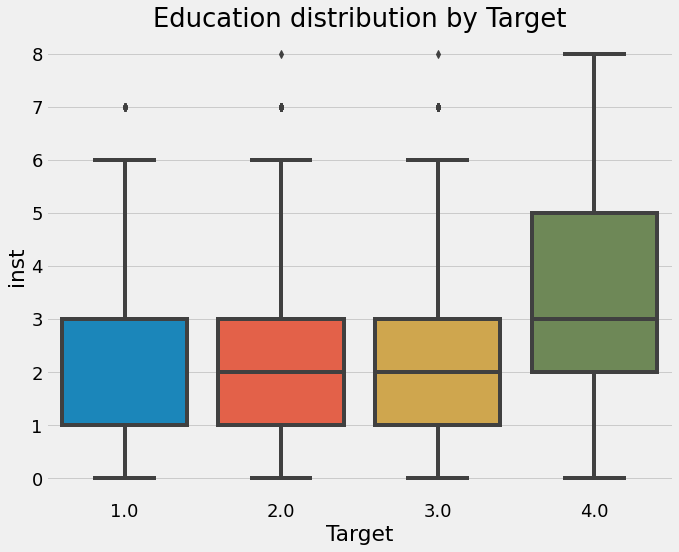

In [121]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Target",y="inst", data= ind)
plt.title("Education distribution by Target")

- Higher levels of education seem to correspond to less extreme levels of poverty. We do need to keep in mind this is on an individual level though and we eventually will have to aggregate this data at the household level. 

## Feature engineering with individual-level variables

We can derive a few new individual-level features using the existing data.

In [122]:
ind['escolari_normalized_by_age'] = ind['escolari'] / ind['age']

In [123]:
ind['inst_normalized_by_age'] = ind['inst'] / ind['age']

We create a new variable called "tech" that combines v18q (have tabelt) and mobilephone (have mobile phone)

In [124]:
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind["tech"].value_counts()

1    24721
2     7936
0      756
Name: tech, dtype: int64

## Aggregating individual-level variables to household-level
- In order to incorporate the individual data into the household data, we need to aggregate it for each household. The simplest way to do this is to `groupby` the family id `idhogar` and then `agg` the data. 
- For ordinal variables, we use the following aggregation functions for each variable: min, max, sum, count, std, range_
- The overall strategy is to use a set of aggregation functions for each individual-level variable, and then use model-based feature selection methods to filter the most predictive features.

In [125]:
# Define custom function (range)
range_ = lambda x: x.max() - x.min() # find the range of the variable
range_.__name__ = 'range_'

In [126]:
# Groupby idhogar (household id) and apply aggregation functions
ind_agg = (ind
           .drop(columns = ["Id","Target"])
           .groupby("idhogar")
           .agg(["min","max","sum","count","std", range_]))

ind_agg

v18q                           dis                                 \
           min max sum count  std range_ min max sum count       std range_   
idhogar                                                                       
000a08204    1   1   3     3  0.0      0   0   0   0     3  0.000000      0   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  0.707107      1   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  0.000000      0   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
...        ...  ..  ..   ...  ...    ...  ..  ..  ..   ...       ...    ...   
ffcdf41de    0   0   0     6  0.0      0   0   0   0     6  0.000000      0   
ffe90d46f    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
fff6d7a90    0   0   0     3  0.0      0   0   0   0     3  0.000000      0   
fff7d6be1    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
fffbede04    0   0   0     3  0.0      0   0   0   0     3  0.000000      0   

          female                                estadocivil1                \
             min max sum count       std range_          min max sum count   
idhogar                                                                      
000a08204      0   1   1     3  0.577350      1            0   1   1     3   
000bce7c4      0   1   1     2  0.707107      1            0   0   0     2   
001845fb0      0   1   2     4  0.577350      1            0   0   0     4   
001ff74ca      1   1   2     2  0.000000      0            0   1   1     2   
003123ec2      0   1   1     4  0.500000      1            0   1   2     4   
...          ...  ..  ..   ...       ...    ...          ...  ..  ..   ...   
ffcdf41de      0   1   5     6  0.408248      1            0   1   2     6   
ffe90d46f      0   1   1     4  0.500000      1            0   1   1     4   
fff6d7a90      0   1   1     3  0.577350      1            0   0   0     3   
fff7d6be1      0   1   2     4  0.577350      1            0   0   0     4   
fffbede04      0   1   1     3  0.577350      1            0   0   0     3   

                           estadocivil2                                \
                std range_          min max sum count      std range_   
idhogar                                                                 
000a08204  0.577350      1            0   1   2     3  0.57735      1   
000bce7c4  0.000000      0            0   0   0     2  0.00000      0   
001845fb0  0.000000      0            0   1   2     4  0.57735      1   
001ff74ca  0.707107      1            0   0   0     2  0.00000      0   
003123ec2  0.577350      1            0   1   2     4  0.57735      1   
...             ...    ...          ...  ..  ..   ...      ...    ...   
ffcdf41de  0.516398      1            0   0   0     6  0.00000      0   
ffe90d46f  0.500000      1            0   0   0     4  0.00000      0   
fff6d7a90  0.000000      0            0   0   0     3  0.00000      0   
fff7d6be1  0.000000      0            0   0   0     4  0.00000      0   
fffbede04  0.000000      0            0   0   0     3  0.00000      0   

          estadocivil3                               estadocivil4          \
                   min max sum count      std range_          min max sum   
idhogar                                                                     
000a08204            0   0   0     3  0.00000      0            0   0   0   
000bce7c4            1   1   2     2  0.00000      0            0   0   0   
001845fb0            0   0   0     4  0.00000      0            0   0   0   
001ff74ca            0   0   0     2  0.00000      0            0   0   0   
003123ec2            0   0   0     4  0.00000      0            0   0   0   
...                ...  ..  ..   ...      ...    ...          ...  ..  ..   
ffcdf41de            0   0   0     6  0.00000      0            0   0   0   
ffe90d46f        

In [127]:
# Rename the columns
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
        
ind_agg.columns = new_col
ind_agg.head()

,v18q-min,v18q-max,v18q-sum,v18q-count,v18q-std,v18q-range_,dis-min,dis-max,dis-sum,dis-count,dis-std,dis-range_,female-min,female-max,female-sum,female-count,female-std,female-range_,estadocivil1-min,estadocivil1-max,estadocivil1-sum,estadocivil1-count,estadocivil1-std,estadocivil1-range_,estadocivil2-min,estadocivil2-max,estadocivil2-sum,estadocivil2-count,estadocivil2-std,estadocivil2-range_,estadocivil3-min,estadocivil3-max,estadocivil3-sum,estadocivil3-count,estadocivil3-std,estadocivil3-range_,estadocivil4-min,estadocivil4-max,estadocivil4-sum,estadocivil4-count,estadocivil4-std,estadocivil4-range_,estadocivil5-min,estadocivil5-max,estadocivil5-sum,estadocivil5-count,estadocivil5-std,estadocivil5-range_,estadocivil6-min,estadocivil6-max,estadocivil6-sum,estadocivil6-count,estadocivil6-std,estadocivil6-range_,estadocivil7-min,estadocivil7-max,estadocivil7-sum,estadocivil7-count,estadocivil7-std,estadocivil7-range_,parentesco1-min,parentesco1-max,parentesco1-sum,parentesco1-count,parentesco1-std,parentesco1-range_,parentesco2-min,parentesco2-max,parentesco2-sum,parentesco2-count,parentesco2-std,parentesco2-range_,parentesco3-min,parentesco3-max,parentesco3-sum,...,instlevel5-count,instlevel5-std,instlevel5-range_,instlevel6-min,instlevel6-max,instlevel6-sum,instlevel6-count,instlevel6-std,instlevel6-range_,instlevel7-min,instlevel7-max,instlevel7-sum,instlevel7-count,instlevel7-std,instlevel7-range_,instlevel8-min,instlevel8-max,instlevel8-sum,instlevel8-count,instlevel8-std,instlevel8-range_,instlevel9-min,instlevel9-max,instlevel9-sum,instlevel9-count,instlevel9-std,instlevel9-range_,mobilephone-min,mobilephone-max,mobilephone-sum,mobilephone-count,mobilephone-std,mobilephone-range_,rez_esc-min,rez_esc-max,rez_esc-sum,rez_esc-count,rez_esc-std,rez_esc-range_,escolari-min,escolari-max,escolari-sum,escolari-count,escolari-std,escolari-range_,age-min,age-max,age-sum,age-count,age-std,age-range_,inst-min,inst-max,inst-sum,inst-count,inst-std,inst-range_,escolari_normalized_by_age-min,escolari_normalized_by_age-max,escolari_normalized_by_age-sum,escolari_normalized_by_age-count,escolari_normalized_by_age-std,escolari_normalized_by_age-range_,inst_normalized_by_age-min,inst_normalized_by_age-max,inst_normalized_by_age-sum,inst_normalized_by_age-count,inst_normalized_by_age-std,inst_normalized_by_age-range_,tech-min,tech-max,tech-sum,tech-count,tech-std,tech-range_
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000a08204,1,1,3,3,0.0,0,0,0,0,3,0.000000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,2,3,0.57735,1,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.000000,0,0,0,0,3,0.0,0,0,0,0,3,0.00000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,1,...,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,1,2,3,0.577350,1,0,0,0,3,0.0,0,1,1,3,3,0.0,0,0.0,0.0,0.0,3,0.0,0.0,0,14,26,3,7.571878,14,4,30,62,3,14.468356,26,0,7,14,3,4.041452,7,0.000000,0.500000,0.900000,3,0.264575,0.500000,0.000000,0.250000,0.483333,3,0.139775,0.250000,2,2,6,3,0.0,0
000bce7c4,0,0,0,2,0.0,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,2,0.000000,0,0,0,0,2,0.00000,0,1,1,2,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,0,0,2,0.0,0,0,0,0,2,0.00000,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,...,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,0,0,2,0.0,0,1,1,2,2,0.0,0,0.0,0.0,0.0,2,0.0,0.0,0,5,5,2,3.535534,5,60,63,123,2,2.121320,3,0,1,1,2,0.707107,1,0.000000,0.083333,0.083333,2,0.058926,0.083333,0.000000,0.016667,0.016667,2,0.011785,0.016667,1,1,2,2,0.0,0
001845fb0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,1,2,4,0.577350,1,0,0,0,4,0.000000,0,0,1,2,4,0.57735,1,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,0,0,4,0.0,0,0,1,2,4,0.57735,1,0,1,1,4,0.500000,1,0,1,1,4,0.500000,1,0,1,2,...,4,0.5,1,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,1,1,4,0.500000,1,0,0,0,4,0.0,0,1,1,4,4,0.0,0,0.0,0.0,0.0,3,0.0,0.0,6,14,41,4,3.304038,8,19,52,142,4,16.421531,33,2,7,16,4,2.160247,5,0.115385,0.526316,1.397906,4,0.18

## Feature selection for aggregated variables
- We can remove one out of every pair of variables with a correlation >0.95

In [128]:
# Create correlation matrix
corr_matrix = ind_agg.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 111 correlated columns to remove.


We'll drop the columns and then merge with the `heads` data to create a final dataframe.

In [129]:
ind_agg = ind_agg.drop(columns = to_drop)

In [130]:
ind_feats = list(ind_agg.columns)
ind_feats

['v18q-min',
 'v18q-sum',
 'v18q-count',
 'v18q-std',
 'v18q-range_',
 'dis-min',
 'dis-max',
 'dis-sum',
 'female-min',
 'female-max',
 'female-sum',
 'female-std',
 'female-range_',
 'estadocivil1-min',
 'estadocivil1-max',
 'estadocivil1-sum',
 'estadocivil2-min',
 'estadocivil2-max',
 'estadocivil2-std',
 'estadocivil3-min',
 'estadocivil3-max',
 'estadocivil3-std',
 'estadocivil4-min',
 'estadocivil4-max',
 'estadocivil5-min',
 'estadocivil5-max',
 'estadocivil5-sum',
 'estadocivil6-min',
 'estadocivil6-max',
 'estadocivil7-min',
 'estadocivil7-max',
 'estadocivil7-sum',
 'estadocivil7-std',
 'parentesco1-min',
 'parentesco1-max',
 'parentesco1-std',
 'parentesco2-min',
 'parentesco2-max',
 'parentesco2-std',
 'parentesco3-min',
 'parentesco3-max',
 'parentesco3-sum',
 'parentesco4-min',
 'parentesco4-max',
 'parentesco4-sum',
 'parentesco5-min',
 'parentesco5-max',
 'parentesco6-min',
 'parentesco6-max',
 'parentesco6-sum',
 'parentesco7-min',
 'parentesco7-max',
 'parentesco8-mi

In [131]:
len(ind_feats)

123

In [132]:
# Merge back to the heads dataframe on the household id
# Note that heads ONLY contains household-level variables, and only contains heads of households only as rows
# The ind_agg dataframe contains aggregated rows (each row is a household)
final = pd.merge(heads, ind_agg, on = 'idhogar', how = 'left')

print('Final features shape: ', final.shape)

Final features shape:  (10307, 222)


In [133]:
final.head()

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,v2a1_missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,...,parentesco6-max,parentesco6-sum,parentesco7-min,parentesco7-max,parentesco8-min,parentesco8-max,parentesco9-min,parentesco9-max,parentesco9-sum,parentesco10-min,parentesco10-max,parentesco11-min,parentesco11-max,parentesco11-sum,parentesco12-min,parentesco12-max,parentesco12-sum,instlevel1-min,instlevel1-max,instlevel1-sum,instlevel2-min,instlevel2-max,instlevel2-sum,instlevel2-std,instlevel3-min,instlevel3-max,instlevel3-sum,instlevel3-std,instlevel4-min,instlevel4-max,instlevel4-sum,instlevel4-std,instlevel5-min,instlevel5-max,instlevel5-sum,instlevel6-min,instlevel6-max,instlevel7-min,instlevel7-max,instlevel8-min,instlevel8-max,instlevel8-sum,instlevel8-std,instlevel9-min,instlevel9-max,mobilephone-min,mobilephone-std,mobilephone-range_,rez_esc-min,rez_esc-max,escolari-min,escolari-max,escolari-sum,escolari-std,escolari-range_,age-min,age-max,age-sum,age-std,age-range_,inst-max,inst-std,inst-range_,escolari_normalized_by_age-min,escolari_normalized_by_age-max,escolari_normalized_by_age-sum,escolari_normalized_by_age-std,escolari_normalized_by_age-range_,inst_normalized_by_age-max,inst_normalized_by_age-std,inst_normalized_by_age-range_,tech-min,tech-sum,tech-std,tech-range_
0,ID_279628684,21eb7fcc1,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,190000.0,0.0,10,0,10.0,1.000000,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,NaN,0,0.0,0.0,10,10,10,NaN,0,43,43,43,NaN,0,3,NaN,0,0.232558,0.232558,0.232558,NaN,0.000000,0.069767,NaN,0.000000,1,1,NaN,0
1,ID_f29eb3ddd,0e5d7a658,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,135000.0,8.0,12,0,12.0,1.000000,4,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,1,1,1,NaN,0,0,1,NaN,0,0.0,0.0,12,12,12,NaN,0,67,67,67,NaN,0,7,NaN,0,0.179104,0.179104,0.179104,NaN,0.000000,0.104478,NaN,0.000000,2,2,NaN,0
2,ID_68de51c94,2c7317ea8,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,False,0.0,8.0,0,11,11.0,0.500000,8,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,1,1,1,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0.0,0.0,11,11,11,NaN,0,92,92,92,NaN,0,4,NaN,0,0.119565,0.119565,0.119565,NaN,0.000000,0.043478,NaN,0.000000,0,0,NaN,0
3,ID_ec05b1a7b,2b58d945f,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,180000.0,1.0,11,0,11.0,1.333333,5,0,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.5,0,0,0,0.0,0,1,1,0.5,0,1,2,0,0,0,0,0,0,0,0.0,0,0,1,0.0,0,0.0,1.0,2,11,33,4.272002,9,8,38,100,14.899664,30,4,1.414214,3,0.250000,0.529412,1.366183,0.126943,0.279412,0.176471,0.033010,0.071207,2,8,0.0,0
4,ID_1284f8aad,d6dae86b7,4.0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,130000.0,1.0,9,0,10.0,4.000000,2,0,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0.5,0,0,0,0.0,0,1,1,0.5,0,1,1,0,0,0,0,0,0,0,0.0,0,0,1,0.0,0,0.0,1.0,0,11,23,5.123475,11,7,30,76,11.690452,23,4,1.825742,4,0

## Some EDA on the processed dataframe

In [134]:
corrs = final.corr()['Target']

In [135]:
corrs.sort_values().head(10)

poor_house_condition   -0.301791
instlevel2-sum         -0.297868
instlevel1-sum         -0.271204
hogar_nin              -0.266309
r4t1                   -0.260917
instlevel2-max         -0.251575
estadocivil1-sum       -0.239130
overcrowding           -0.234954
instlevel2-std         -0.234376
instlevel1-max         -0.232430
Name: Target, dtype: float64

In [136]:
corrs.sort_values().dropna().tail(10)

walls                    0.298737
phones_per_capita        0.299026
escolari-min             0.306693
floor                    0.307605
instlevel8-max           0.317815
house_structure_score    0.332446
meaneduc                 0.333652
inst-max                 0.368229
escolari-max             0.373091
Target                   1.000000
Name: Target, dtype: float64

We can see some of the variables that we made are highly correlated with the Target.

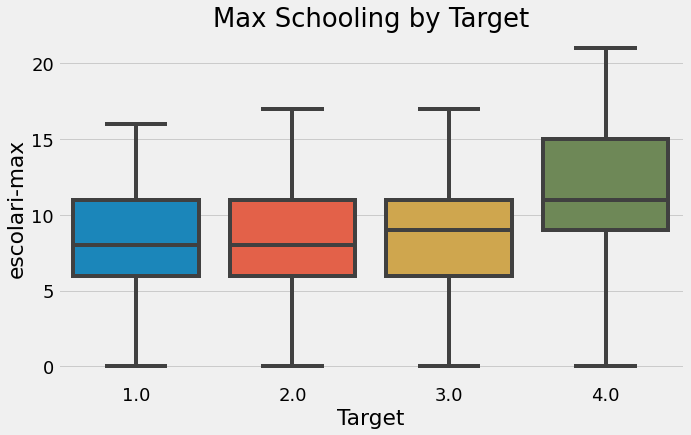

In [137]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'escolari-max', data = final);
plt.title('Max Schooling by Target');

There seems to be positive association between max schooling and Target

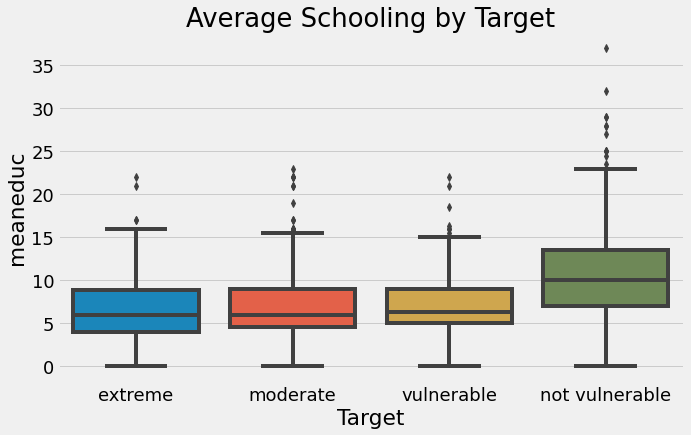

In [138]:
# Average schooling and Target
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'meaneduc', data = final);
plt.xticks([0, 1, 2, 3], poverty_label_mapping.values())
plt.title('Average Schooling by Target');

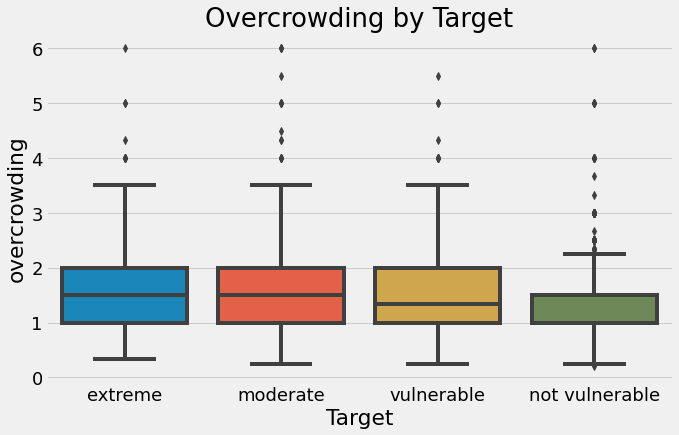

In [139]:
# Overcrowding and Target
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'overcrowding', data = final);
plt.xticks([0, 1, 2, 3], poverty_label_mapping.values())
plt.title('Overcrowding by Target');

## Save final interim data

In [140]:
final.to_pickle(Path("data","interim","interim.pkl"))

## Next:

Now that we have an interim dataset (cleaned, reformatted, with some data engineering and selection performed). The following steps of our data project workflow we will done in the next notebook:

4. Compare several machine learning models and select one
5. Optimize the selected model
6. Investigate model predictions (e.g., feature importance using the "random bar" method)
7. Draw conclusions 